### Import Statements

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Image

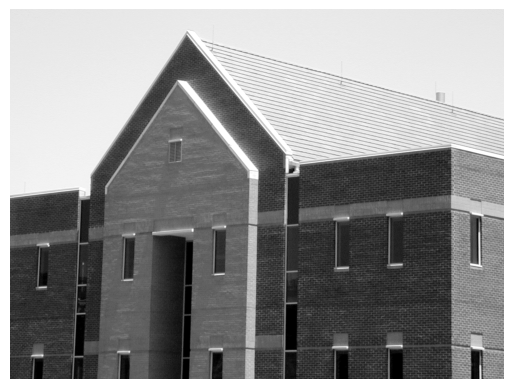

In [4]:
# Load the image
image = cv2.imread('drive/MyDrive/images/ete_1.tif', cv2.IMREAD_GRAYSCALE)

# display the image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

### Demonstrate the following edge detection methods and interpret the results

#### i. First Order Derivative Methods

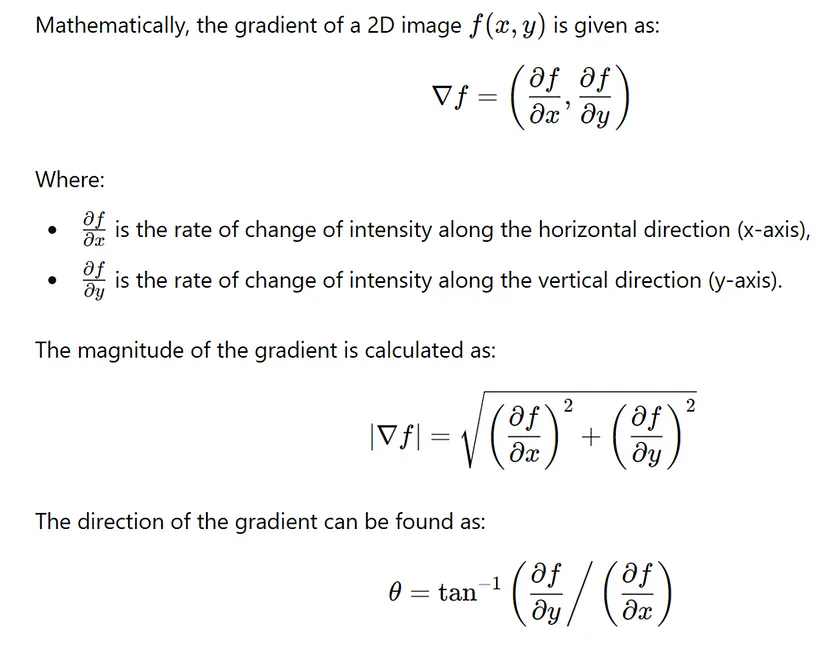

##### Using Sobel Operator

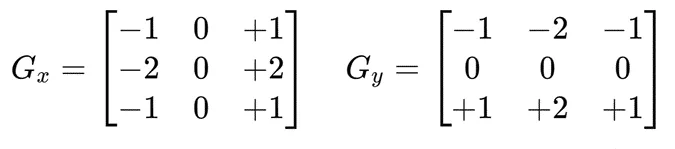

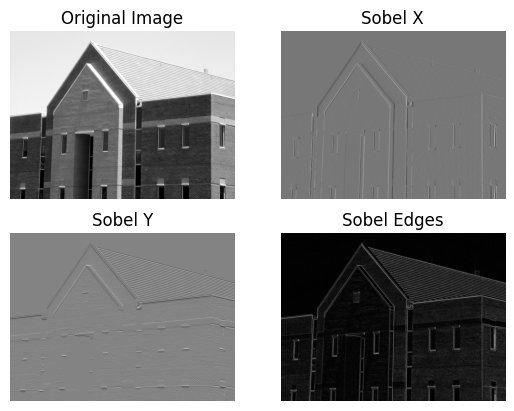

In [6]:
# Apply Sobel operator
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction
sobel_edges = cv2.magnitude(sobel_x, sobel_y) # Combine gradients

# display the image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Sobel X')
plt.axis('off')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Sobel Y')
plt.axis('off')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Sobel Edges')
plt.axis('off')
plt.imshow(sobel_edges, cmap='gray')

plt.show()

The Sobel operator is commonly used in applications where some degree of smoothing is required, as it helps reduce noise while detecting edges

##### Using Prewitt Operator

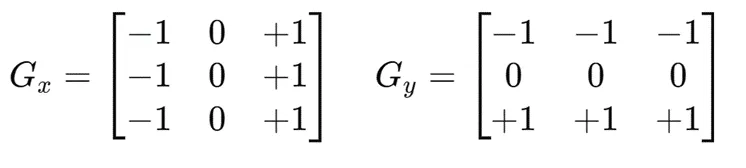

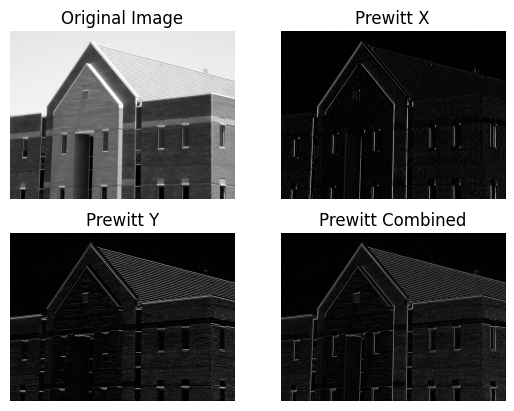

In [7]:
# Apply Perwitt operator
prewittx_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
prewitty_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

prewittx = cv2.filter2D(image, -1, prewittx_kernel)
prewitty = cv2.filter2D(image, -1, prewitty_kernel)

prewitt_combined = cv2.magnitude(prewittx.astype(float), prewitty.astype(float))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Prewitt X')
plt.axis('off')
plt.imshow(prewittx, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Prewitt Y')
plt.axis('off')
plt.imshow(prewitty, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Prewitt Combined')
plt.axis('off')
plt.imshow(prewitt_combined, cmap='gray')

plt.show()

##### Using Robinson Compass Operator

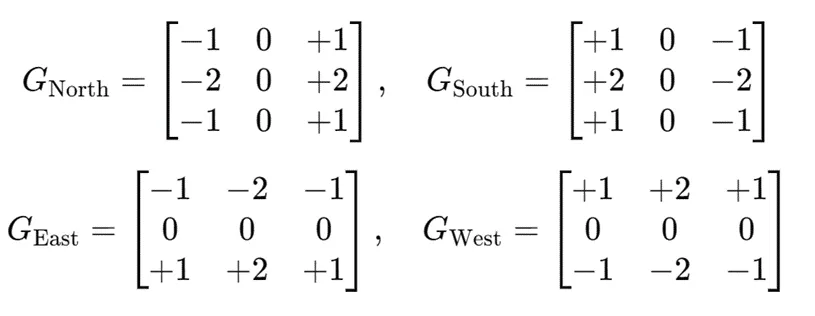

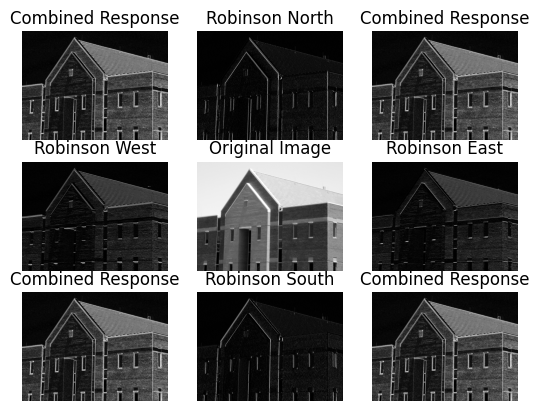

In [8]:
# Define Robinson Compass Kernels
robinson_kernels = {
    'north': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    'south': np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
    'east': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'west': np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
}

# Prepare response arrays
responses = {}
combined_response = np.zeros_like(image, dtype=float)

# Apply each directional kernel and store the results
for direction, kernel in robinson_kernels.items():
    filtered_image = cv2.filter2D(image, -1, kernel)
    responses[direction] = filtered_image.astype(float)
    combined_response = np.maximum(combined_response, filtered_image.astype(float))


plt.subplot(3, 3, 1)
plt.title('Combined Response')
plt.axis('off')
plt.imshow(combined_response, cmap='gray')

plt.subplot(3, 3, 2)
plt.title('Robinson North')
plt.axis('off')
plt.imshow(responses['north'], cmap='gray')

plt.subplot(3, 3, 3)
plt.title('Combined Response')
plt.axis('off')
plt.imshow(combined_response, cmap='gray')

plt.subplot(3, 3, 4)
plt.title('Robinson West')
plt.axis('off')
plt.imshow(responses['west'], cmap='gray')

plt.subplot(3, 3, 5)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')

plt.subplot(3, 3, 6)
plt.title('Robinson East')
plt.axis('off')
plt.imshow(responses['east'], cmap='gray')

plt.subplot(3, 3, 7)
plt.title('Combined Response')
plt.axis('off')
plt.imshow(combined_response, cmap='gray')

plt.subplot(3, 3, 8)
plt.title('Robinson South')
plt.axis('off')
plt.imshow(responses['south'], cmap='gray')

plt.subplot(3, 3, 9)
plt.title('Combined Response')
plt.axis('off')
plt.imshow(combined_response, cmap='gray')

##### Comparison: Sobel, Prewitt, and Robinson
- Sobel Operator: Offers a balance between edge detection and noise suppression due to its weighted smoothing effect.  
- Prewitt Operator: A simpler alternative to Sobel, faster to compute but more sensitive to noise.  
- Robinson Operator: Effective at detecting edges in multiple directions, ideal for orientation-specific edge detection.

#### ii. Second Order Derivative Methods

Zero-Crossing Detection: One key feature of second-order derivatives is their ability to detect zero-crossings. This refers to locations where the second derivative changes sign (from positive to negative or vice versa). These points often correspond to the location of an edge.

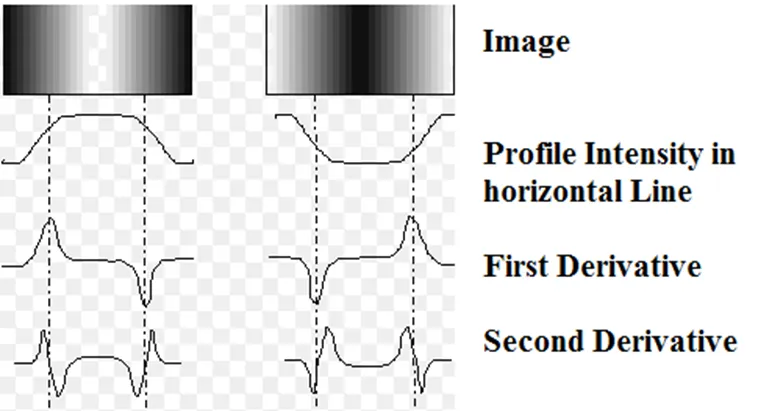

Sharper Edge Detection: First-order derivatives detect gradient magnitudes but can also highlight noise. Second-order derivatives are more effective at isolating true edges while suppressing gradual changes, which can help in reducing noise sensitivity.

Enhanced Localization: Second-order methods can localize the edges more precisely by focusing on where intensity changes accelerate.

##### Using Laplacian Operator

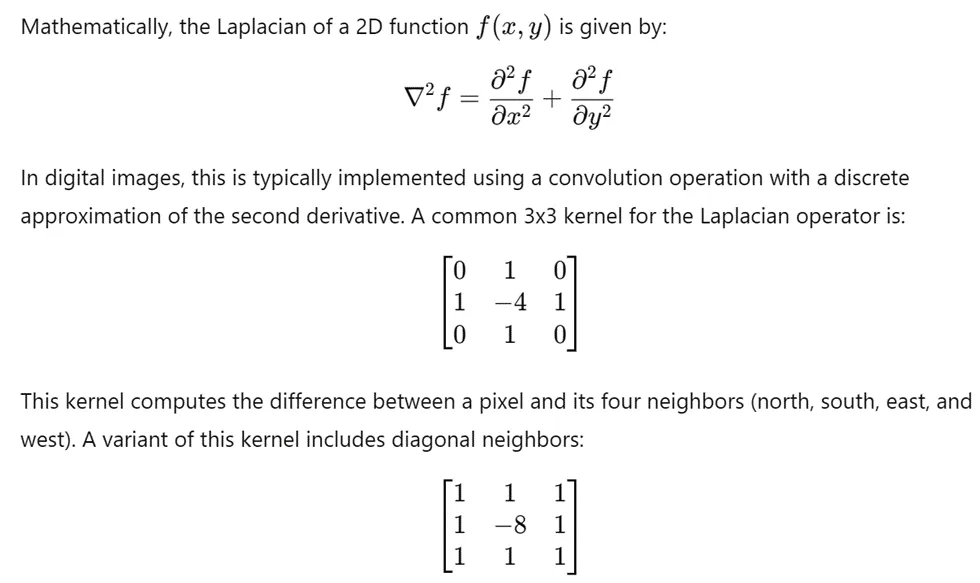

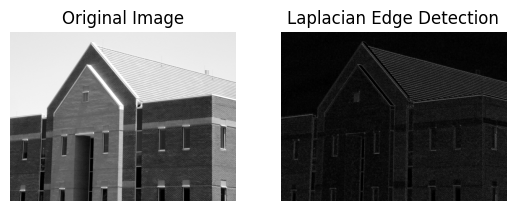

In [12]:
# Apply the Laplacian operator
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display the original and edge-detected images

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Laplacian edge-detected image
plt.subplot(1, 2, 2)
plt.title('Laplacian Edge Detection')
plt.axis('off')
plt.imshow(np.abs(laplacian), cmap='gray')

plt.show()

##### Using Marr-Hildreth Edge Detector
The Marr-Hildreth edge detector combines the Laplacian operator with Gaussian smoothing to handle noise. This is also known as the Laplacian of Gaussian (LoG) method. It first applies a Gaussian blur to the image to smooth out high-frequency noise, then applies the Laplacian operator

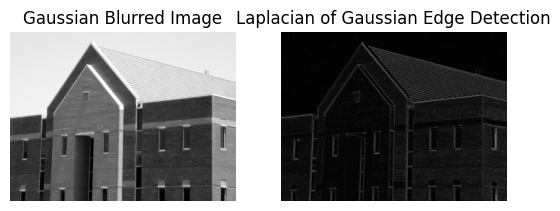

In [11]:
# Apply Gaussian smoothing
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Laplacian operator
laplacian_blurred = cv2.Laplacian(blurred_image, cv2.CV_64F)

# Display results

# Blurred image
plt.subplot(1, 2, 1)
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.imshow(blurred_image, cmap='gray')

# Laplacian of Gaussian result
plt.subplot(1, 2, 2)
plt.title('Laplacian of Gaussian Edge Detection')
plt.axis('off')
plt.imshow(np.abs(laplacian_blurred), cmap='gray')

plt.show()

Second-order derivative methods in edge detection, such as the Laplacian operator and Laplacian of Gaussian (LoG), offer significant advantages for precise edge localization by detecting the rate of intensity change. Unlike first-order methods that focus on gradient magnitudes, second-order approaches are adept at identifying zero-crossings, where the intensity changes rapidly, highlighting sharp edges with better clarity. However, their sensitivity to noise requires caution, making Gaussian smoothing a useful preprocessing step

#### iii. Optimum Edge Detection Method

##### What is Edge Detection?
Edge detection involves identifying the boundaries within an image where there is a significant change in intensity. These boundaries can signify transitions between different objects or regions within the image. Effective edge detection is essential for various applications, including image segmentation, feature extraction, and object recognition

##### Canny Edge Detector

Widely regarded as one of the most effective edge detection algorithms, the Canny edge detector employs a multi-stage approach:

- Noise Reduction: Applies Gaussian filtering to smooth the image and reduce noise.


- Gradient Calculation: Computes the intensity gradient to identify potential edges.

- Non-maximum Suppression: Thin out edges by eliminating pixels that are not part of an edge.After obtaining the gradient magnitudes and directions, the next step is to thin out the edges. This is done through non-maximum suppression, which keeps only the local maxima in the gradient direction. The algorithm looks at each pixel and checks if it is a local maximum in the gradient direction. If not, it is suppressed (set to zero).

- Hysteresis Thresholding: Utilizes two thresholds to distinguish between strong and weak edges, linking weak edges to strong edges based on connectivity. Finally, hysteresis thresholding is applied to identify strong and weak edges. Two thresholds, high and low, are used: Pixels with a gradient magnitude above the high threshold are marked as strong edges.Pixels with a gradient magnitude below the low threshold are suppressed.Weak edges (between the two thresholds) are retained only if they are connected to strong edges.This step helps in retaining important edge information while removing noise and irrelevant details

##### Using Canny Edge Detection

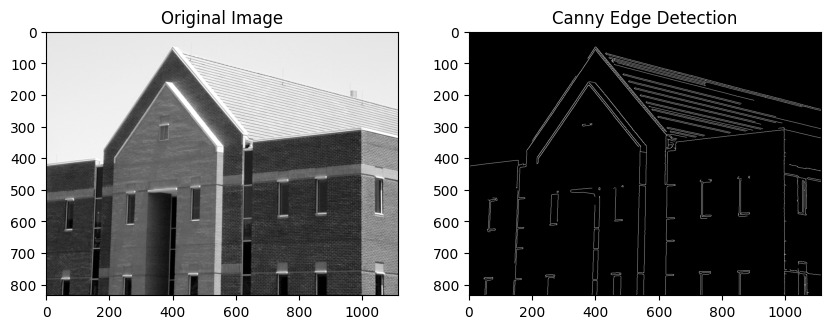

In [13]:
# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 1.5)

# Apply Canny edge detector
edges = cv2.Canny(blurred, threshold1=100, threshold2=200)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')

plt.show()

The Canny edge detector is employed to identify edges in a given image. The original image is first blurred using a Gaussian filter to reduce noise, enhancing the accuracy of edge detection. The result effectively highlights distinct edges while suppressing noise, showcasing the robustness of the Canny method in varying conditions.

##### Advantages of the Optimum Edge Detection Method
- Robustness: The combination of multiple techniques allows for greater resilience against noise, leading to clearer edge delineation.
- Flexibility: The method can be tuned to adjust sensitivity and detect different types of edges, making it applicable in various scenarios.
- Accuracy: By integrating the strengths of different algorithms, the optimum edge detection method enhances overall accuracy, providing more reliable results.


### References:

[Understanding First Order Derivative Methods in Edge Detection by Helenjoy](https://medium.com/@helenjoy88/understanding-first-order-derivative-methods-in-edge-detection-0d5d81d25a78)

[Understanding Second-Order Derivative Methods in Edge Detection by Helenjoy](https://medium.com/@helenjoy88/understanding-second-order-derivative-methods-in-edge-detection-6c549a19dcf2)


[Understanding the Optimum Edge Detection Method in Image Processing by Helenjoy](https://medium.com/@helenjoy88/understanding-the-optimum-edge-detection-method-in-image-processing-2bacc0d60765)